# Import Package

In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import scipy.stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

# 1. Make Sample Data

In [3]:
# norm(x, y) x : mean, y : distribution
# X0 mean : -2, distribution 1 , shape : (40,1), category 0
# X1 mean : 2, distribution 1 , shape : (60,1), category 1
X0 = scipy.stats.norm(-2, 1).rvs(40)
X1 = scipy.stats.norm(2, 1).rvs(60)

# [:, np.newaxis] : change shape (ex) (60,) -> (60,1) : we need for stack two matrix
X = np.hstack([X0, X1])[:, np.newaxis] 

# two category : 0 and 1
y0 = np.zeros(40)
y1 = np.ones(60)
y = np.hstack([y0, y1])

X.shape, y.shape

((100, 1), (100,))

# 2. Draw Histogram

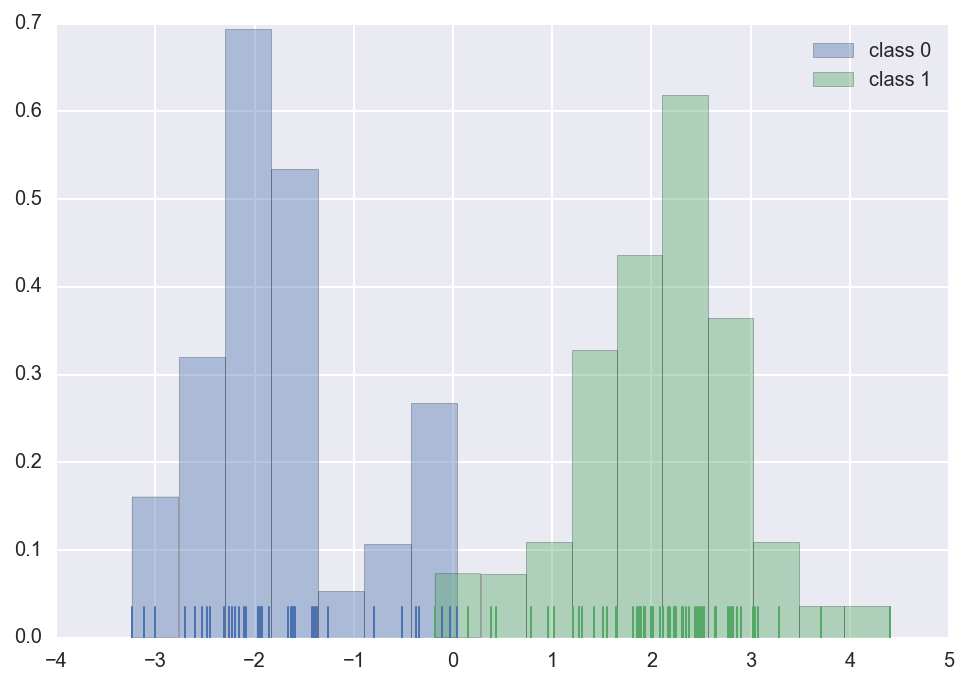

In [4]:
sns.distplot(X0, rug=True, kde=False, norm_hist=True, label="class 0")
sns.distplot(X1, rug=True, kde=False, norm_hist=True, label="class 1")
plt.legend()

# 3. Make Gaussian Naive Bayes Model

In [5]:
clf_norm = GaussianNB().fit(X, y)

In [6]:
# the number of categories(y)
clf_norm.classes_

array([ 0.,  1.])

In [7]:
# the number of (X0, X1) samples
clf_norm.class_count_

array([ 40.,  60.])

In [8]:
# the rate of (X0, X1) samples 
clf_norm.class_prior_

array([ 0.4,  0.6])

In [9]:
# mean of (X0, X1)
clf_norm.theta_

array([[-1.75176994],
       [ 2.08589069]])

In [10]:
# distribution of (X0, X1)
clf_norm.sigma_

array([[ 0.66957309],
       [ 0.68820588]])

# 4. Predict

In [76]:
# predict classification of -1
x_new = -1
clf_norm.predict_proba([[x_new]])

# the rate of category 0 is 0.97.. 

array([[ 0.97633995,  0.02366005]])

In [81]:
# likelihood
px = sp.stats.norm(clf_norm.theta_, np.sqrt(clf_norm.sigma_)).pdf(x_new)
px

array([[ 0.30085478],
       [ 0.00486049]])

In [78]:
p = px.flatten() * clf_norm.class_prior_
p

array([ 0.12034191,  0.0029163 ])

In [79]:
p / p.sum()

array([ 0.97633995,  0.02366005])